In [ ]:
# Install and import libraries
%%capture

# Used for reading tables of data, like TSV
!pip install pandas
import pandas as pd
import io

# Used for reading in Molecules
!pip install rdkit
from rdkit import Chem

# Used for reaction operator projection
from rdkit.Chem import rdChemReactions

# Used to make graphics
from rdkit.Chem import Draw

# Used to chart graphics
!pip install matplotlib
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import AllChem

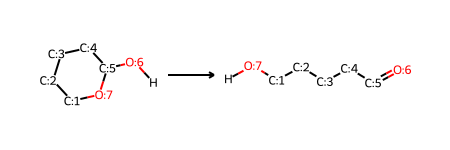

In [ ]:
# Define a SMIRKS string for RO
smirks = '[C:1]1-[C:2]-[C:3]-[C:4]-[C:5](-[O:6]-[H])-[O:7]-1>>[O:7](-[H])-[C:1]-[C:2]-[C:3]-[C:4]-[C:5]=[O:6]'

# Create a reaction operator object from the SMIRKS string
reactionOperator = rdChemReactions.ReactionFromSmarts(smirks)
reactionOperator

In [ ]:
inchi = 'InChI=1S/C6H13O9P/c7-3-2(1-14-16(11,12)13)15-6(10)5(9)4(3)8/h2-10H,1H2,(H2,11,12,13)/p-2/t2-,3-,4+,5-,6?/m1/s1'

# Corrected RDKit import for reaction operators
mol = Chem.MolFromInchi(str(inchi))
mol = Chem.AddHs(mol)

# Assuming `mol` is correctly generated from the InChI
products = reactionOperator.RunReactants([mol])

# Debugging: Check if there are any products
if not products:
    print("No products generated. Check SMIRKS pattern and molecule suitability.")
else:
    for product_set in products:
        for chem in product_set:
            print(Chem.MolToSmiles(chem))
            print(Chem.MolToInchi(chem))


[H]O[C@@]([H])([C@]([H])(O[H])[C@]([H])(O[H])C([H])([H])OP(=O)([O-])[O-])[C@@]([H])(O[H])C([H])=O
InChI=1S/C6H13O9P/c7-1-3(8)5(10)6(11)4(9)2-15-16(12,13)14/h1,3-6,8-11H,2H2,(H2,12,13,14)/p-2/t3-,4+,5+,6+/m0/s1


[20:26:28] WARNING: Proton(s) added/removed



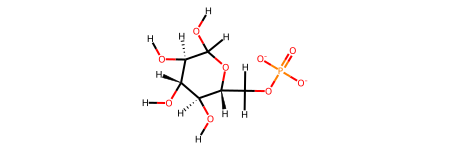

In [ ]:
mol

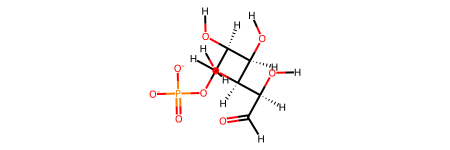

In [ ]:
products[0][0]